# <center> PriceBot : Sedans </center>

In [1]:
# Imports
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pricebot.Analyzer import Analyzer

In [2]:
#CSS

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rcParams['axes.facecolor'] = (1,1,1,0)
COLOR = 'gray'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [3]:
# Setup
az = Analyzer()

def get_make(item):
    return re.findall('[A-Z][^A-Z]*', item)[0]
def get_model(item):
    return re.findall('[A-Z][^A-Z]*', item)[1]

makes = list(set([get_make(item) for item in az.items]))
models = list(set([get_model(item) for item in az.items]))

# Plot Sizing
from pylab import rcParams
rcParams['figure.figsize'] = (15, 7)

No files merged


## References

Similar analysis to what I did, but is more generic, less details. Still a good read<br>
[Price your car with data](http://bytes.schibsted.com/price-car-data/)

## Intra-Make : Model Comparison
Comparison of models within each make<br>
Plots might be more similar if they were normalized by their initial prices<br>

Each Make contains 4 plots:
- Age Vs Cost __:__ Derivative
- Mileage Vs Cost __:__ Derivative

### Age vs Cost

Shows depreciation rate of each model with respect to how old the car is in years<br>
Plot on the left is Age vs Cost<br>
Plot on the right is the negation of each models first derivative<br>
Meaning at year x, the model is depreciating at $y per year

### Mileage vs Cost

Shows depreciation rate of each model with respect to how many miles the car has on it<br>
Left plot is Cost of car at listed mileage<br>
Right plot is depreciation of car in $ per 10,000 miles

c:\python27\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


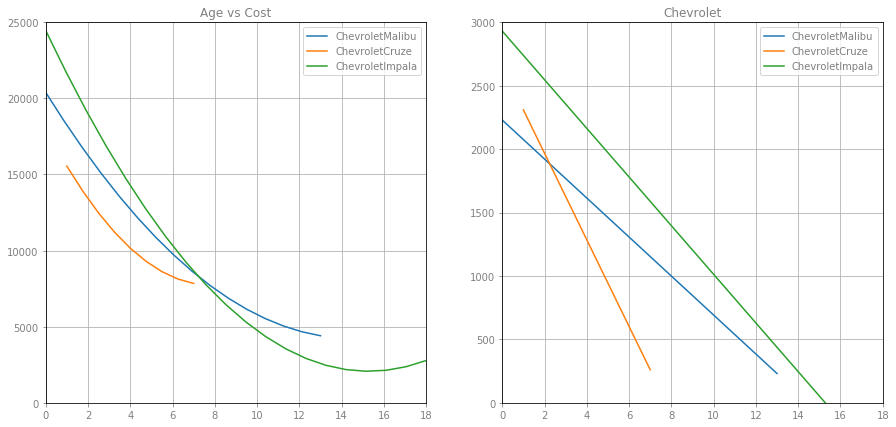

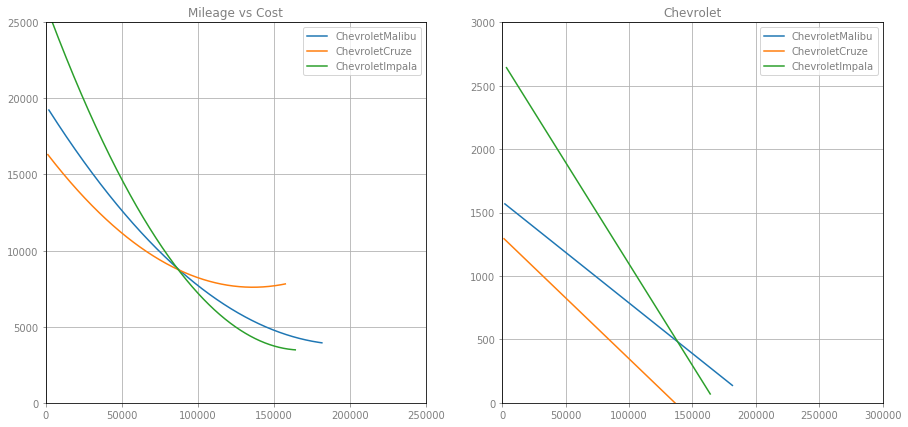

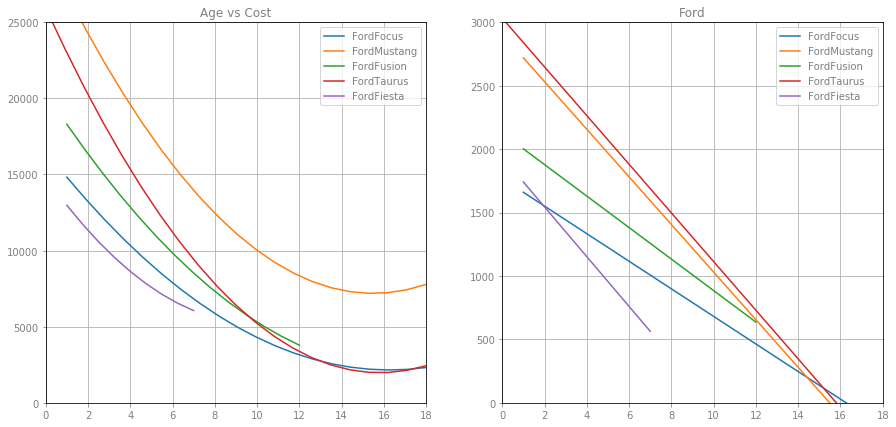

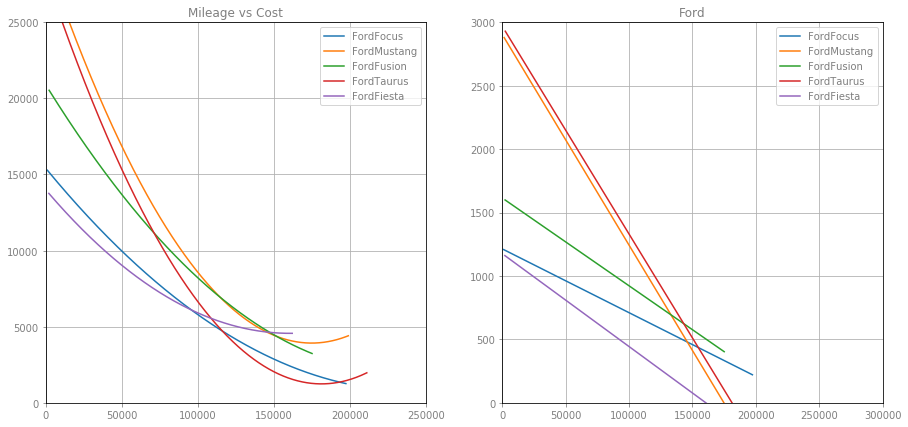

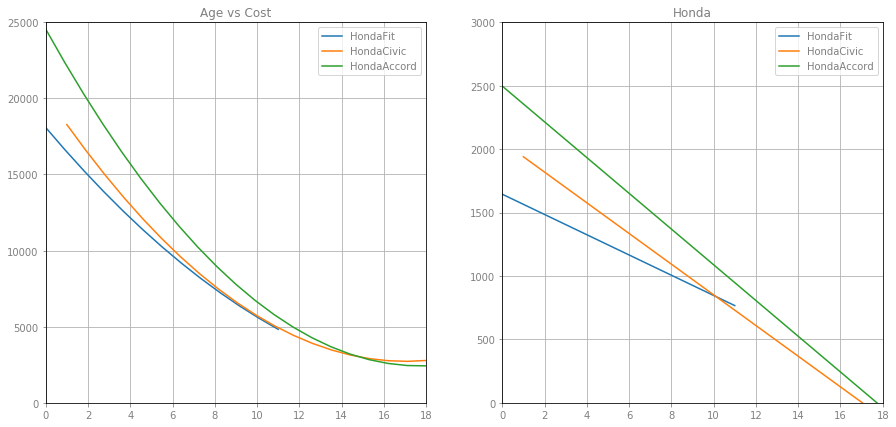

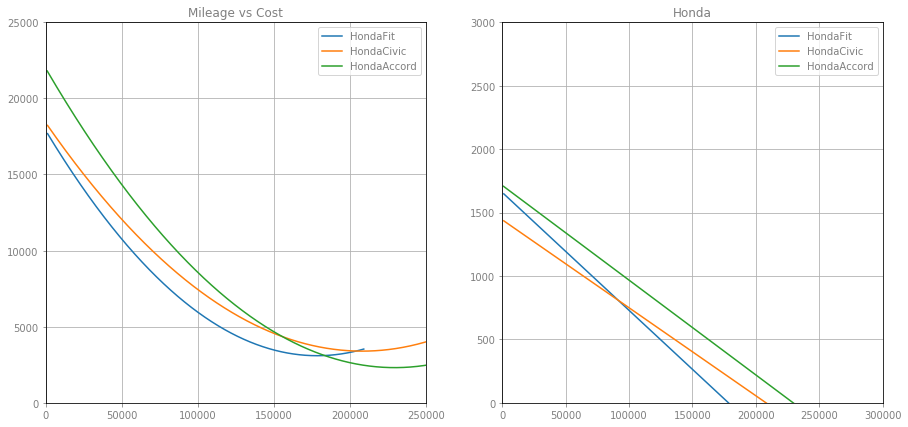

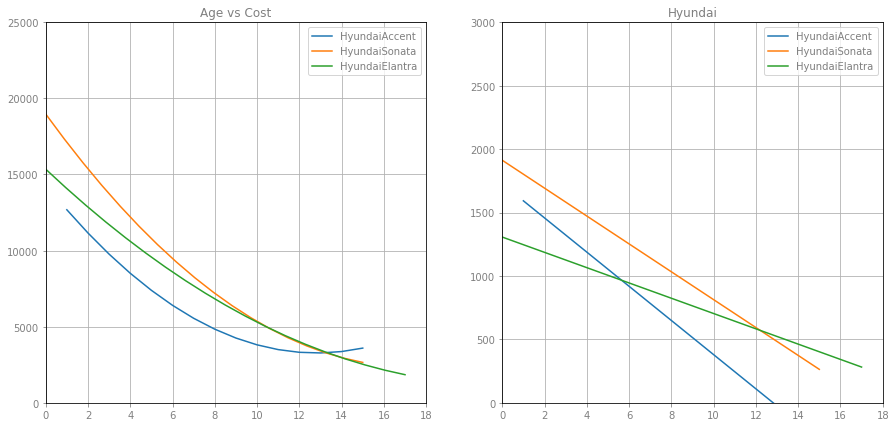

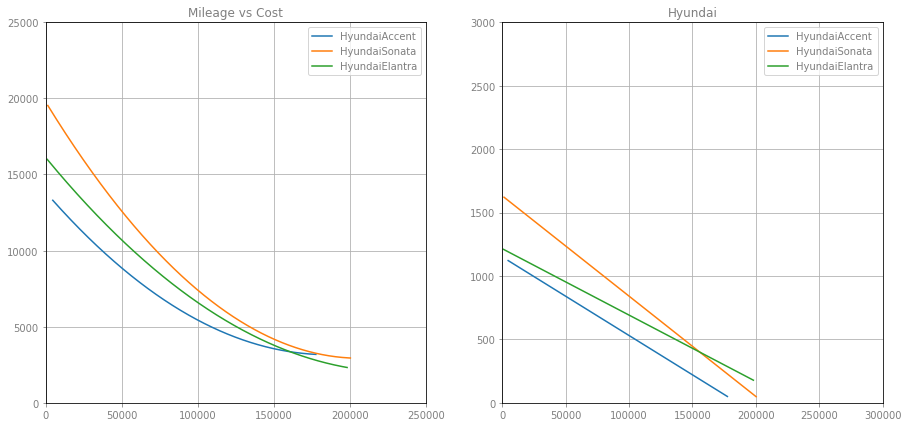

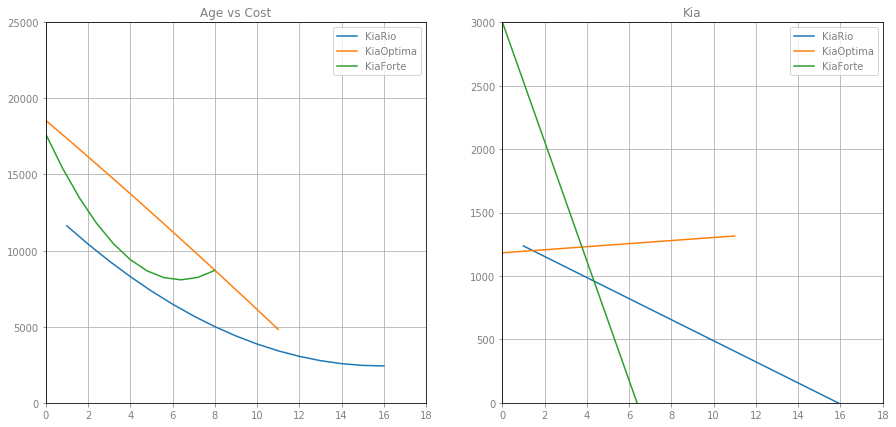

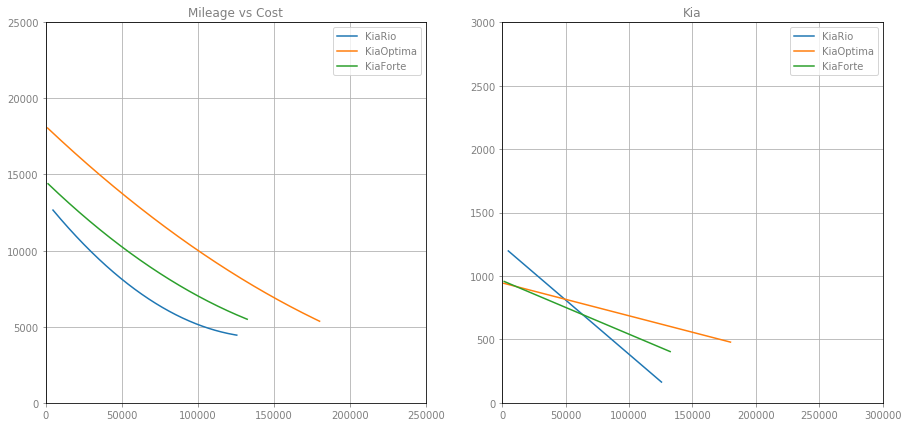

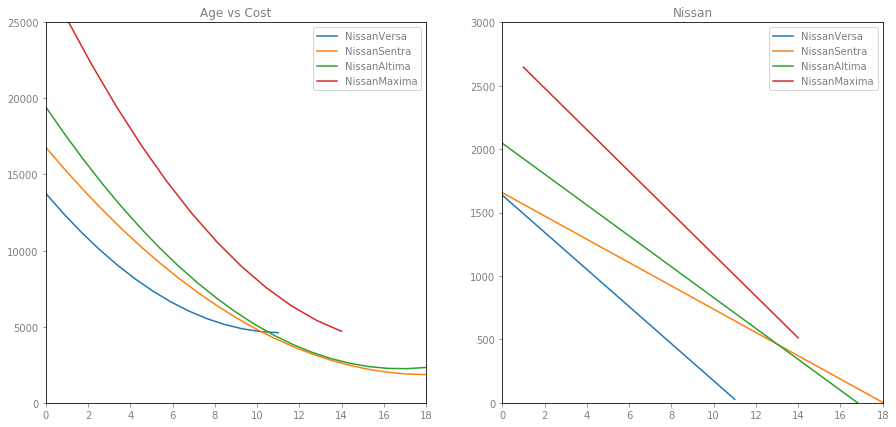

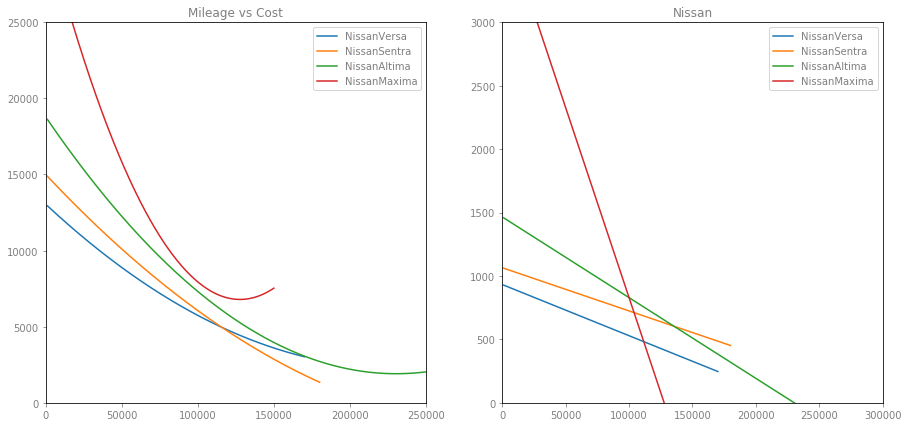

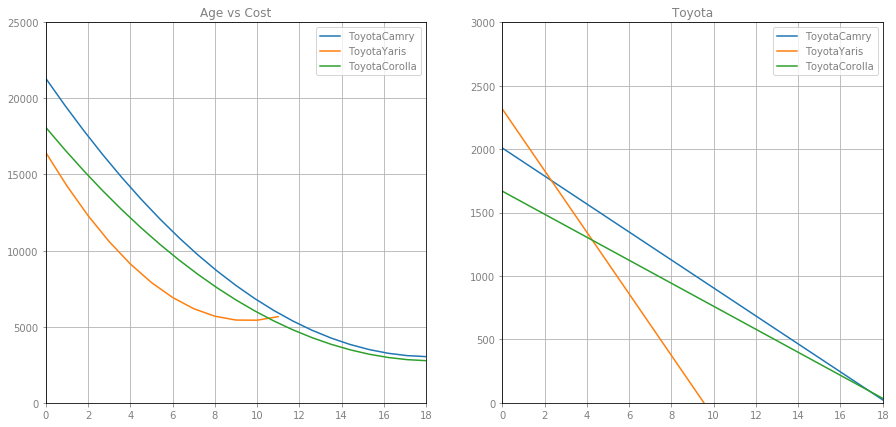

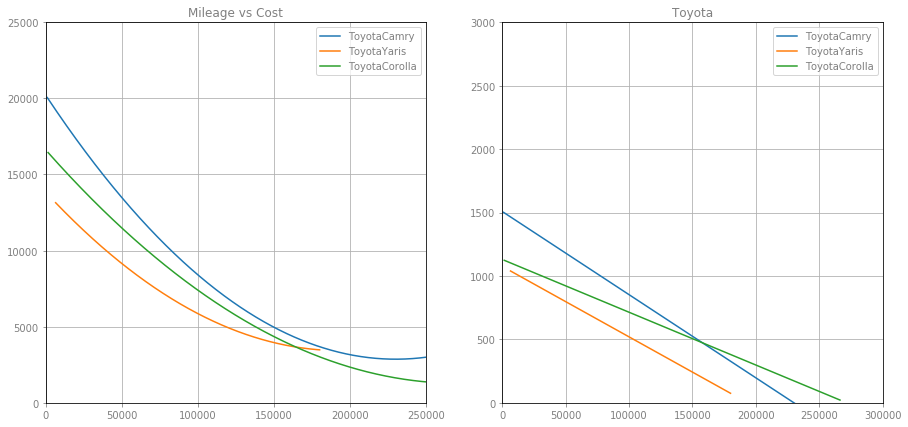

In [4]:
# Intra-Make Model Comparison

for make in sorted(makes):
    plt.figure()
    look_at = [item for item in az.items if get_make(item) == make]
    for item in look_at:
        az.best_fit(item, 'Age')
    plt.title(make)
    plt.figure()
    for item in look_at:
        az.best_fit(item, 'Mileage')
    plt.title(make)

## Inter-Make : Model Comparison

Taking the best models from the each make to compare.

- __Chevrolet__ -> The clear winner is the __Cruze__!<br>
- __Ford__ -> Close call between the Fiesta and the Focus, but the __Fiesta__ wins out. Choose the Focus if you need a slightly bigger car<br>
- __Honda__ -> Close call between the Civic and the Fit, but I'd say the __Civic__ wins out because its 21" longer than the Fit<br>
- __Hyundai__ -> Close call between the Accent and the Elantra, but I'd say the __Accent__ wins out. Choose the Elantra if you need a slightly bigger car<br>
- __Kia__ -> All the data for the Kia exists at under 100,000 miles making it harder to extrapolate good plots. However, following the trends of the other vehicles, the Rio or the Forte would win out and the determining factor would again be size, making the __Rio__ the better option <br>
- __Nissan__ -> The clear winner is the __Versa__!<br>
- __Toyota__ -> The clear winner is the __Corolla__!



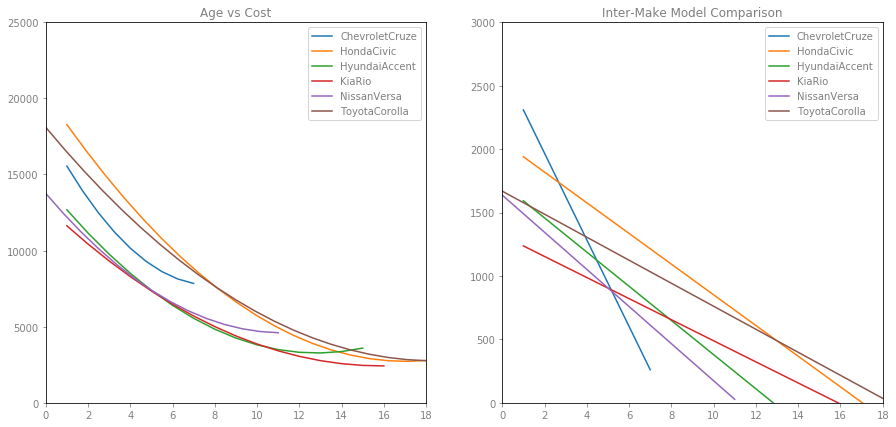

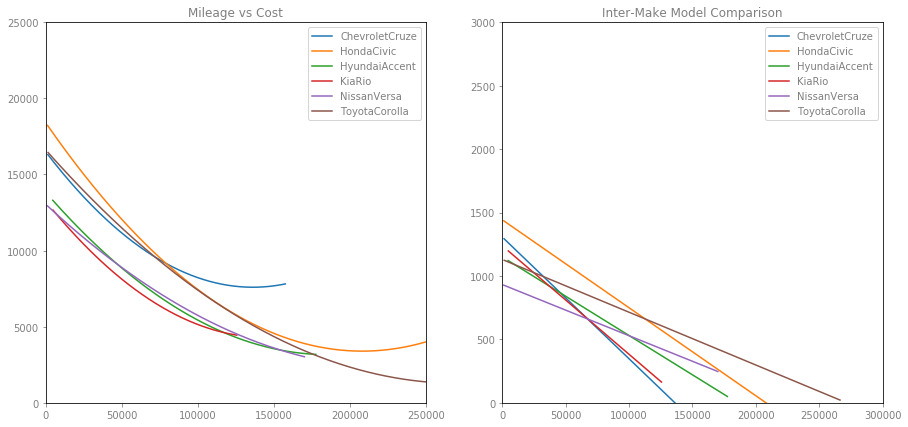

In [5]:
# Best Model in each Make
makemodel = [
    "ChevroletCruze",
    #"FordFiesta",
    "HondaCivic",
    "HyundaiAccent",
    "KiaRio",
    "NissanVersa",
    "ToyotaCorolla"
]

for item in makemodel:
    az.best_fit(item, 'Age')

plt.title("Inter-Make Model Comparison")
plt.figure()

for item in makemodel:
    az.best_fit(item, 'Mileage')

plt.title("Inter-Make Model Comparison")
plt.show()

Now the choice clearly comes down between the __Nissan Versa__ and the __Kia Rio__.<br>
This probably boils down which one you can get a better deal on locally. I personally like the Versa better, but I'm trying to be pragmatic here.

Here is the final comparison

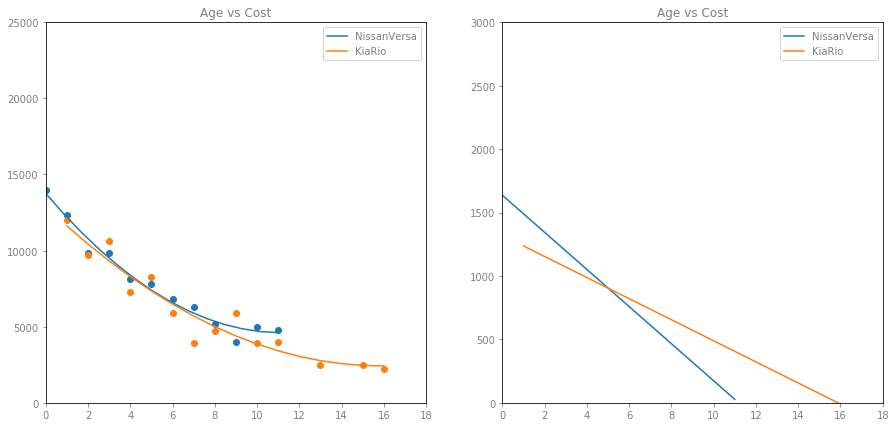

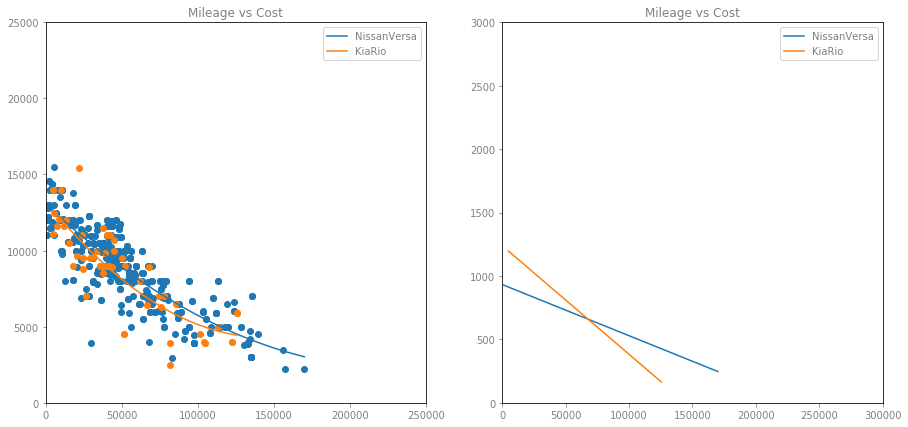

In [6]:
# Final Comparison
az.best_fit("NissanVersa", 'Age', verbose=True)
az.best_fit("KiaRio", 'Age', verbose=True)
plt.figure()
az.best_fit("NissanVersa", 'Mileage', verbose=True)
az.best_fit("KiaRio", 'Mileage', verbose=True)
plt.show()

Now I wouldn't rate the reliability of a Nissan or a Kia to be as good as say a Toyota or a Honda, but if you're looking to buy a new(er) car, then a the Kia or Nissan would the one to choose. If you're looking to buy an older car, the __Honda Civic__ is probably the way to go after it hits about 130,000 miles or about 8-10 years.<br>

And of course the more people that read this, the less accurate it becomes... If everyone in the US read this right now and agreed with my analysis, this would create a higher demand for Nissan/Kia, increasing their price to accommodate demand.

I am in no way responsible for the decisions you make from this analysis, it is merely my pragmatic approach to picking a car, do with the results as you will.